# **Análisis de Databases para Clasificación de emociones con ECG**
---
**Curso:** Introducción a las Señales Biomédicas (ISB)

**Fecha:** 02/09/2025


**Resumen y Objetivo de este Notebook**

Este notebook constituye el segundo entregable del proyecto y se enfoca en las fases iniciales de la metodología **CRISP-DM**, adaptada para el procesamiento de señales biomédicas. El objetivo principal es realizar un análisis exploratorio de datos (EDA) exhaustivo sobre el dataset **WESAD (WEarable Stress and Affect Detection)** para evaluar su viabilidad.

A través de este documento, se abordan las siguientes fases:
*   **1. Comprensión del Negocio (Business Understanding):** Se define la problemática de la detección de estrés y se establecen los objetivos del análisis.
*   **2. Comprensión de los Datos (Data Understanding):** Se carga, explora y visualiza el dataset WESAD, con un enfoque principal en la señal de **Electrocardiograma (ECG)**, para identificar patrones fisiológicos que diferencien los estados de calma y estrés.

El análisis concluye con una evaluación de la calidad y el potencial de los datos, determinando si son adecuados para las fases posteriores de preparación y modelado de un clasificador de Machine Learning.

---

## 1. Metodología: CRISP-DM para Señales Biomédicas

El proyecto se guiará por el modelo de procesos **CRISP-DM (Cross-Industry Standard Process for Data Mining)**, un marco metodológico ampliamente aceptado para la minería de datos y el análisis predictivo. En este caso, se adapta específicamente al dominio de las señales biomédicas, como el electrocardiograma (ECG) y la bioimpedancia, con el fin de abordar problemáticas clínicas.

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ByfxF35yAhGgBbAo9XvuOQ.png" alt="CRISP-DM" width="400">

*Figura: Fases del modelo CRISP-DM.*

## 2. Comprensión del Negocio (Business Understanding)

### 2.1. Problemática: Detección Objetiva de Estrés y Depresión

La depresión es un problema de salud pública significativo en el Perú. Su diagnóstico a menudo es tardío debido a estigmas sociales y barreras de acceso. Las señales biomédicas como el **Electrocardiograma (ECG)** reflejan la actividad del sistema nervioso autónomo y son sensibles a las variaciones emocionales. El análisis de la **Variabilidad de la Frecuencia Cardíaca (HRV)**, derivada del ECG, puede ofrecer un biomarcador objetivo y accesible para la detección temprana de estados emocionales alterados, complementando los métodos clínicos tradicionales.


### 2.2. Objetivos del Análisis Exploratorio

*   **Validar la calidad y estructura** del dataset WESAD.
*   **Identificar y visualizar patrones** en la señal de ECG que se correlacionen con los estados fisiológicos de interés (especialmente estrés vs. estado basal).
*   **Evaluar la viabilidad** de los datos para las siguientes fases del proyecto: preparación de datos, extracción de características (HRV) y modelado.

## 3. Comprensión de los Datos (Data Understanding)

### 3.1. Descripción del Dataset WESAD

Para el desarrollo de este proyecto se empleó la base de datos multimodal **WESAD**, un benchmark público para la detección de estrés y estados afectivos. Fue seleccionado por tres razones clave:

*   **Datos de Alta Calidad:** Proporciona señales fisiológicas de grado de investigación, muestreadas a alta frecuencia (700 Hz para el sensor de pecho).
*   **Etiquetas Validadas:** Los datos están sincronizados y etiquetados con tres estados afectivos claramente definidos (*neutral, estrés y diversión*), inducidos bajo condiciones de laboratorio controladas.
*   **Relevancia para el Proyecto:** Incluye la señal de ECG, que es el foco de nuestro análisis, junto con otras señales complementarias.

**Dataset:** <a href="https://www.kaggle.com/datasets/orvile/wesad-wearable-stress-affect-detection-dataset/data" target="_blank">Disponible en Kaggle</a>

#### Modalidades de Señal y Sensores
<table>
  <thead>
    <tr>
      <th>Dispositivo</th>
      <th>Señal</th>
      <th>Frecuencia</th>
      <th>Unidades</th>
      <th>Descripción</th>
    </tr>
  </thead>
  <tbody>
    <tr><td rowspan="6"><b>RespiBAN (Pecho)</b></td><td>ECG</td><td>700 Hz</td><td>mV</td><td>Electrocardiograma </td></tr>
    <tr><td>EDA</td><td>700 Hz</td><td>μS</td><td>Actividad Electrodérmica</td></tr>
    <tr><td>EMG</td><td>700 Hz</td><td>mV</td><td>Electromiograma</td></tr>
    <tr><td>TEMP</td><td>700 Hz</td><td>°C</td><td>Temperatura corporal</td></tr>
    <tr><td>ACC (3 ejes)</td><td>700 Hz</td><td>g</td><td>Acelerómetro</td></tr>
    <tr><td>RESP</td><td>700 Hz</td><td>%</td><td>Patrón respiratorio</td></tr>
    <tr><td rowspan="4"><b>Empatica E4 (Muñeca)</b></td><td>ACC (3 ejes)</td><td>32 Hz</td><td>1/64g</td><td>Acelerómetro</td></tr>
    <tr><td>BVP</td><td>64 Hz</td><td>-</td><td>Blood Volume Pulse</td></tr>
    <tr><td>EDA</td><td>4 Hz</td><td>μS</td><td>Actividad Electrodérmica</td></tr>
    <tr><td>TEMP</td><td>4 Hz</td><td>°C</td><td>Temperatura corporal</td></tr>
  </tbody>
</table>

#### Estructura de Datos y Formatos
<ul>
  <li><b>SX_readme.txt:</b> Información demográfica del sujeto y notas de recolección.</li>
  <li><b>SX_quest.csv:</b> Protocolo del estudio y resultados de cuestionarios PANAS, STAI, SAM, SSSQ.</li>
  <li><b>SX_respiban.txt:</b> Datos crudos del RespiBAN (pecho).</li>
  <li><b>SX_E4_Data.zip:</b> Datos crudos del Empatica E4 (muñeca).</li>
  <li><b>SX.pkl:</b> Archivo Python pickle con datos sincronizados y etiquetados, listo para análisis.</li>
</ul>

#### Etiquetas del Protocolo
Las siguientes son las etiquetas principales almacenadas en el archivo <code>SX.pkl</code> que definen el estado experimental en cada momento:

| Label | Estado Experimental |
| :---: | :--- |
| **0** | No definido / Transitorio |
| **1** | Neutral (Línea Base) |
| **2** | Estrés |
| **3** | Diversión |
| **4** | Meditación |
| **5/6/7** | Deben Ignorarse |

### 3.2. Configuración del Entorno y Librerías

El primer paso técnico es asegurar que nuestro entorno de ejecución tenga todas las herramientas necesarias para el análisis. La siguiente celda de código se encarga de instalar las librerías fundamentales de Python para la manipulación de datos (`pandas`, `numpy`), visualización (`matplotlib`, `seaborn`) y la descarga de datos desde su fuente (`kaggle`).

Este bloque se ejecuta una sola vez para preparar el ambiente.

In [1]:
# Para este paso, primero conecto al env que creé para este notebook, con 
# conda activate proyecto_lab2_ECG

# Configuración del Entorno y Librerías

# Este bloque instala todas las librerías necesarias en el entorno de Conda
# que está usando este notebook.
# Se ejecuta una sola vez para preparar el ambiente.
import sys
!{sys.executable} -m pip install --quiet pandas numpy matplotlib seaborn scikit-learn jupyter kaggle --no-warn-script-location

print("Librerías requeridas instaladas en el entorno 'proyecto_lab2_ECG'.")

Librerías requeridas instaladas en el entorno 'proyecto_lab2_ECG'.


In [2]:
# Se importan las librerías para el análisis de datos y manejo de archivos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import shutil
from IPython.display import display
import tkinter as tk
from tkinter import filedialog

In [3]:
# Configuración de Rutas
# Define aquí la ruta exacta donde quieres que se guarde el dataset
# En mi caso, tengo el github en la siguiente direccion:
TARGET_PATH = r"D:\UNIDAD D\UNIVERSIDAD\2025-2\ISB\proyecto\GRUPO-06-ISB-2025-II\Laboratorios\Laboratorio 2 - Informe Bases de Datos\Emotions_ECG_database"

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Librerías de análisis importadas y rutas configuradas.")
print(f"El dataset se guardará en: {TARGET_PATH}")

Librerías de análisis importadas y rutas configuradas.
El dataset se guardará en: D:\UNIDAD D\UNIVERSIDAD\2025-2\ISB\proyecto\GRUPO-06-ISB-2025-II\Laboratorios\Laboratorio 2 - Informe Bases de Datos\Emotions_ECG_database


### 3.3. Carga de Datos desde Kaggle

Para garantizar la reproducibilidad del análisis, automatizamos la descarga del dataset WESAD directamente desde Kaggle. El siguiente bloque de código realiza dos acciones principales:

1.  **Autenticación:** Verifica la existencia del archivo de credenciales `kaggle.json`. Si no lo encuentra, solicita al usuario que lo seleccione manualmente. Esto es necesario para que la API de Kaggle autorice la descarga.
2.  **Descarga y Descompresión:** Una vez autenticado, el código descarga el archivo zip del dataset en la ruta especificada (`TARGET_PATH`) y lo descomprime, dejando los datos listos para ser cargados en memoria.

In [5]:
# Autenticación y Descarga de Datos desde Kaggle

# Paso 1: Configuración de la Autenticación de Kaggle
kaggle_dir = os.path.expanduser('~/.kaggle')
kaggle_json_path = os.path.join(kaggle_dir, 'kaggle.json')

# Verificar si el archivo de credenciales ya está configurado. Si no, lo pedimos.
if not os.path.exists(kaggle_json_path):
    print("El archivo kaggle.json no se encuentra en la ubicación por defecto.")
    print("Se abrirá una ventana para que selecciones el archivo.")
    
    # Abrir el diálogo para seleccionar el archivo
    root = tk.Tk()
    root.withdraw()
    selected_path = filedialog.askopenfilename(
        title="Selecciona tu archivo kaggle.json",
        filetypes=[("JSON files", "*.json")]
    )
    
    if selected_path:
        os.makedirs(kaggle_dir, exist_ok=True)
        shutil.copy(selected_path, kaggle_json_path)
        os.chmod(kaggle_json_path, 0o600)
        print(f"¡Éxito! kaggle.json ha sido copiado a: {kaggle_json_path}")
    else:
        print("Operación cancelada. La descarga podría fallar.")
else:
    print(f"Credenciales de Kaggle encontradas en: {kaggle_json_path}")

Credenciales de Kaggle encontradas en: C:\Users\Alvaro/.kaggle\kaggle.json


In [6]:
# --- Paso 2: Importación de la API de Kaggle y Descarga ---
# Ahora que el JSON está en su lugar, podemos importar y usar la librería 'kaggle'.
try:
    import kaggle
    kaggle.api.authenticate()
    print("\nAutenticación con Kaggle exitosa.")
    dataset_name = 'orvile/wesad-wearable-stress-affect-detection-dataset'
    
    final_wesad_path = os.path.join(TARGET_PATH, 'WESAD')

    if not os.path.exists(final_wesad_path):
        print(f"Descargando y descomprimiendo el dataset '{dataset_name}' en: {TARGET_PATH}...")
        kaggle.api.dataset_download_files(dataset_name, path=TARGET_PATH, unzip=True)
        print("¡Dataset listo para el análisis!")
    else:
        print(f"La carpeta WESAD ya existe en '{TARGET_PATH}'. Saltando descarga.")

except OSError as e:
    print(f"\nError de autenticación con Kaggle: {e}")
    print("Por favor, asegúrate de que el archivo 'kaggle.json' seleccionado sea válido y vuelve a ejecutar la celda.")
except Exception as e:
    # En caso no se encuentre botará error
    print(f"\nOcurrió un error inesperado durante la descarga: {e}")
    print(f"Verifica que el nombre del dataset '{dataset_name}' sea correcto.")


Autenticación con Kaggle exitosa.
Descargando y descomprimiendo el dataset 'orvile/wesad-wearable-stress-affect-detection-dataset' en: D:\UNIDAD D\UNIVERSIDAD\2025-2\ISB\proyecto\GRUPO-06-ISB-2025-II\Laboratorios\Laboratorio 2 - Informe Bases de Datos\Emotions_ECG_database...
Dataset URL: https://www.kaggle.com/datasets/orvile/wesad-wearable-stress-affect-detection-dataset
¡Dataset listo para el análisis!


### 3.4. Exploración Inicial del DataFrame (Sujeto S2)

Antes de analizar a toda la población, es una buena práctica inspeccionar los datos de un único sujeto para comprender la estructura y verificar la calidad de las señales. En este paso, cargaremos el archivo `S2.pkl`, que contiene los datos pre-procesados y sincronizados del sujeto S2.

La siguiente celda realizará las siguientes tareas:
1.  **Cargar el archivo `.pkl`** utilizando la librería `pickle`.
2.  **Extraer las señales del sensor de pecho** (ACC, ECG, EMG, EDA, Temp, Resp) y las etiquetas de estado.
3.  **Ensamblar estos datos en un DataFrame de `pandas`**, la estructura fundamental para el análisis de datos en Python.
4.  **Visualizar las primeras filas y la distribución de las etiquetas** para confirmar que los datos se han cargado correctamente.

Archivo de datos del sujeto S2 cargado exitosamente desde:
Emotions_ECG_database/WESAD\S2\S2.pkl

--- Estructura del Archivo .pkl ---
Claves principales del diccionario: ['signal', 'label', 'subject']
Señales en el dispositivo del pecho ('chest'): ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']

--- Creando y Explorando el DataFrame ---
Primeras 5 filas del DataFrame:


,ACC_X,ACC_Y,ACC_Z,ECG,EMG,EDA,Temp,Resp,label
0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0
1,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0
2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0
3,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0
4,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0



--- Distribución de Etiquetas ---


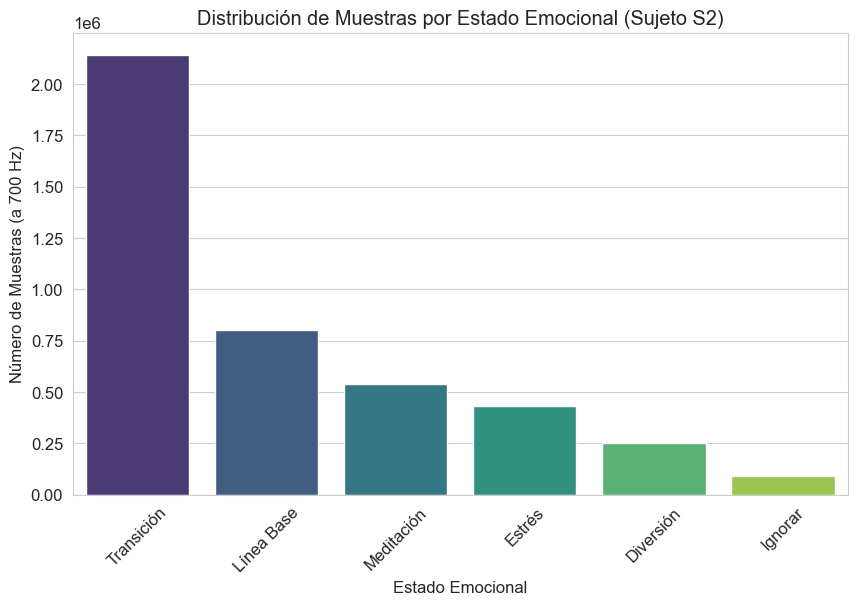

In [10]:
#Exploración Inicial del DataFrame (Sujeto S2)

# Ruta al archivo de datos ya descargado
# Usamos el archivo .pkl que contiene los datos sincronizados y listos para analizar.
# La ruta se ajusta para que coincida con la estructura de tu proyecto.
base_path = 'Emotions_ECG_database/'
subject_path = os.path.join(base_path, 'WESAD', 'S2', 'S2.pkl')

try:
    with open(subject_path, 'rb') as file:
        data = pickle.load(file, encoding='latin1')
    print(f"Archivo de datos del sujeto S2 cargado exitosamente desde:\n{subject_path}\n")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta '{subject_path}'.")
    data = None

if data:
    # --- Estructura del archivo .pkl ---
    print("--- Estructura del Archivo .pkl ---")
    print(f"Claves principales del diccionario: {list(data.keys())}")
    chest_data_raw = data['signal']['chest']
    print(f"Señales en el dispositivo del pecho ('chest'): {list(chest_data_raw.keys())}\n")

    # --- Creación del DataFrame ---
    print("--- Creando y Explorando el DataFrame ---")
    df_chest = pd.DataFrame()
    for signal_name, signal_data in chest_data_raw.items():
      if signal_name == 'ACC':
        df_chest['ACC_X'] = signal_data[:, 0]
        df_chest['ACC_Y'] = signal_data[:, 1]
        df_chest['ACC_Z'] = signal_data[:, 2]
      else:
        df_chest[signal_name] = signal_data.flatten()

    df_chest['label'] = data['label'].flatten()
    print("Primeras 5 filas del DataFrame:")
    display(df_chest.head())

    # --- Distribución de Etiquetas ---
    print("\n--- Distribución de Etiquetas ---")
    label_map = {
        0: 'Transición', 1: 'Línea Base', 2: 'Estrés', 3: 'Diversión',
        4: 'Meditación', 5: 'Ignorar', 6: 'Ignorar', 7: 'Ignorar'
    }
    label_counts = df_chest['label'].map(label_map).value_counts().dropna()
    
    plt.figure(figsize=(10, 6))
    
    sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette="viridis", legend=False)
    
    plt.title('Distribución de Muestras por Estado Emocional (Sujeto S2)')
    plt.xlabel('Estado Emocional')
    plt.ylabel('Número de Muestras (a 700 Hz)')
    plt.xticks(rotation=45)
    plt.show()

### 3.5. Conversión y Visualización de la Señal de ECG

El objetivo de esta sección es realizar una primera inspección visual de la señal de ECG. A diferencia de otras señales en el dataset, la documentación de WESAD indica que la señal de ECG ya se encuentra en una escala física (mV), por lo que no requiere una conversión adicional.

Graficaremos un segmento de 10 segundos de la señal para:
*   **Validar Visualmente:** Confirmar que la señal tiene la morfología característica de un electrocardiograma (complejos QRS, ondas P y T).
*   **Evaluar la Calidad:** Observar el nivel de ruido y la presencia de posibles artefactos.

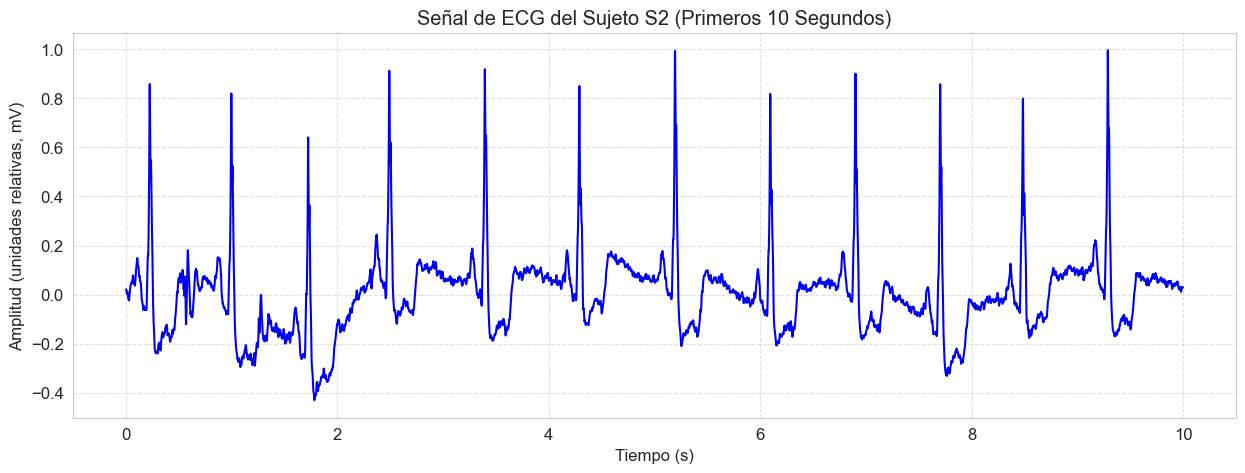

In [27]:
# Visualización de la Señal de ECG Sujeto S2

# --- ANÁLISIS ---
# La columna 'ECG' en el archivo .pkl ya está en una escala física (mV o similar).
# No es necesario aplicar la fórmula de conversión. La llamaremos 'ECG_mV' por claridad.
df_chest['ECG_mV'] = df_chest['ECG']

# --- Visualización de un Segmento de ECG ---
sampling_rate = 700
time_axis = np.arange(len(df_chest)) / sampling_rate

plt.figure(figsize=(15, 5))
plt.plot(time_axis[:sampling_rate * 10], df_chest['ECG_mV'][:sampling_rate * 10], color='blue')
plt.title('Señal de ECG del Sujeto S2 (Primeros 10 Segundos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (unidades relativas, mV)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 3.6. Análisis Comparativo de ECG por Estado Emocional

Este es un paso crucial en la fase de Comprensión de los Datos. El objetivo aquí es **validar visualmente nuestra hipótesis principal:** que existen diferencias fisiológicas medibles en la señal de ECG entre un estado de calma (`Línea Base`) y un estado de `Estrés`.

Para ello, la siguiente celda de código:
1.  **Convierte las unidades** de otras señales relevantes (EMG, EDA, TEMP) a sus escalas físicas para un análisis más interpretable.
2.  **Filtra y segmenta los datos**, extrayendo una ventana de 15 segundos tanto para el estado de `Línea Base` (etiqueta 1) como para el de `Estrés` (etiqueta 2).
3.  **Genera gráficos comparativos** que muestran ambas condiciones lado a lado, permitiendo una fácil identificación de cambios en la frecuencia cardíaca, conductancia de la piel, tensión muscular y temperatura.

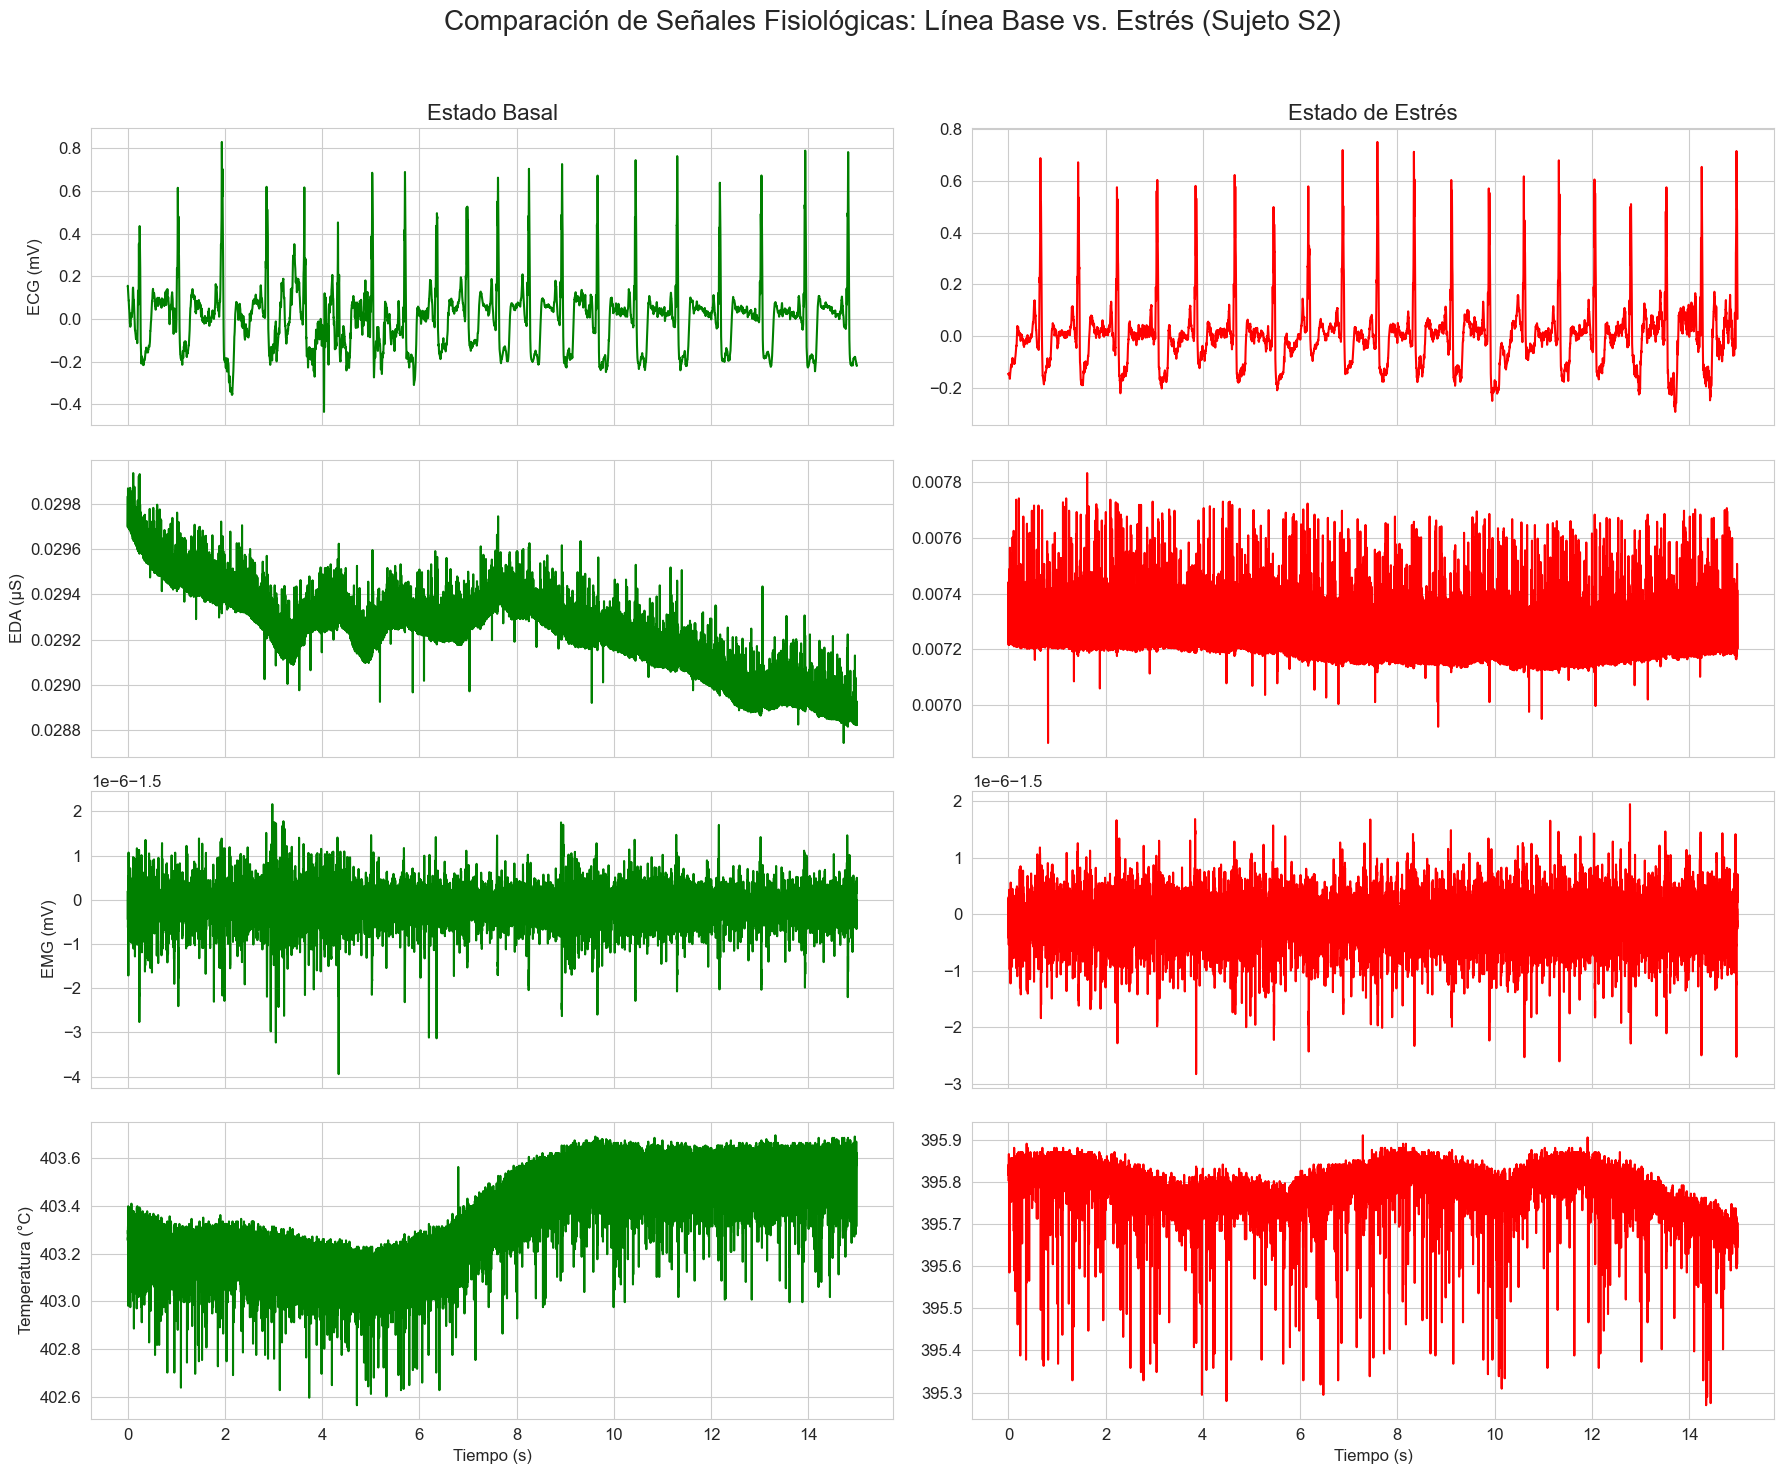

In [30]:
# Visualización Comparativa de Señales: Línea Base vs. Estrés

# --- Preparación para la visualización ---
vcc = 3.0
chan_bit_16 = 2**16
chan_bit_12 = 2**12

df_chest['EMG_mV'] = ((df_chest['EMG'] / chan_bit_16) - 0.5) * vcc
df_chest['EDA_uS'] = (((df_chest['EDA'] / chan_bit_12) * vcc) / 0.12)
vout = (df_chest['Temp'] * vcc) / (chan_bit_16 - 1)
rntc = (10000 * vout) / (vcc - vout)
log_rntc = np.log(rntc)
df_chest['TEMP_C'] = 1.0 / (1.12764514e-3 + 2.34282709e-4 * log_rntc + 8.77303013e-8 * log_rntc**3) - 273.15

# Filtramos los datos para las dos condiciones de interés
df_baseline = df_chest[df_chest['label'] == 1]
df_stress = df_chest[df_chest['label'] == 2]

# Seleccionamos un segmento de 15 segundos
start_index = 30 * sampling_rate
end_index = start_index + (15 * sampling_rate)
baseline_segment = df_baseline.iloc[start_index:end_index]
stress_segment = df_stress.iloc[start_index:end_index]
time_segment = np.arange(len(baseline_segment)) / sampling_rate

# --- Creación de los Gráficos Comparativos ---
fig, axes = plt.subplots(4, 2, figsize=(18, 16), sharex=True)
fig.suptitle('Comparación de Señales Fisiológicas: Línea Base vs. Estrés (Sujeto S2)', fontsize=20, y=0.95)
axes[0, 0].set_title('Estado Basal', fontsize=16); axes[0, 1].set_title('Estado de Estrés', fontsize=16)

# 1. Gráfico de ECG
axes[0, 0].plot(time_segment, baseline_segment['ECG_mV'], color='green'); axes[0, 0].set_ylabel('ECG (mV)')
axes[0, 1].plot(time_segment, stress_segment['ECG_mV'], color='red')

# 2. Gráfico de EDA
axes[1, 0].plot(time_segment, baseline_segment['EDA_uS'], color='green'); axes[1, 0].set_ylabel('EDA (μS)')
axes[1, 1].plot(time_segment, stress_segment['EDA_uS'], color='red')

# 3. Gráfico de EMG
axes[2, 0].plot(time_segment, baseline_segment['EMG_mV'], color='green'); axes[2, 0].set_ylabel('EMG (mV)')
axes[2, 1].plot(time_segment, stress_segment['EMG_mV'], color='red')

# 4. Gráfico de TEMP
axes[3, 0].plot(time_segment, baseline_segment['TEMP_C'], color='green'); axes[3, 0].set_ylabel('Temperatura (°C)'); axes[3, 0].set_xlabel('Tiempo (s)')
axes[3, 1].plot(time_segment, stress_segment['TEMP_C'], color='red'); axes[3, 1].set_xlabel('Tiempo (s)')

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

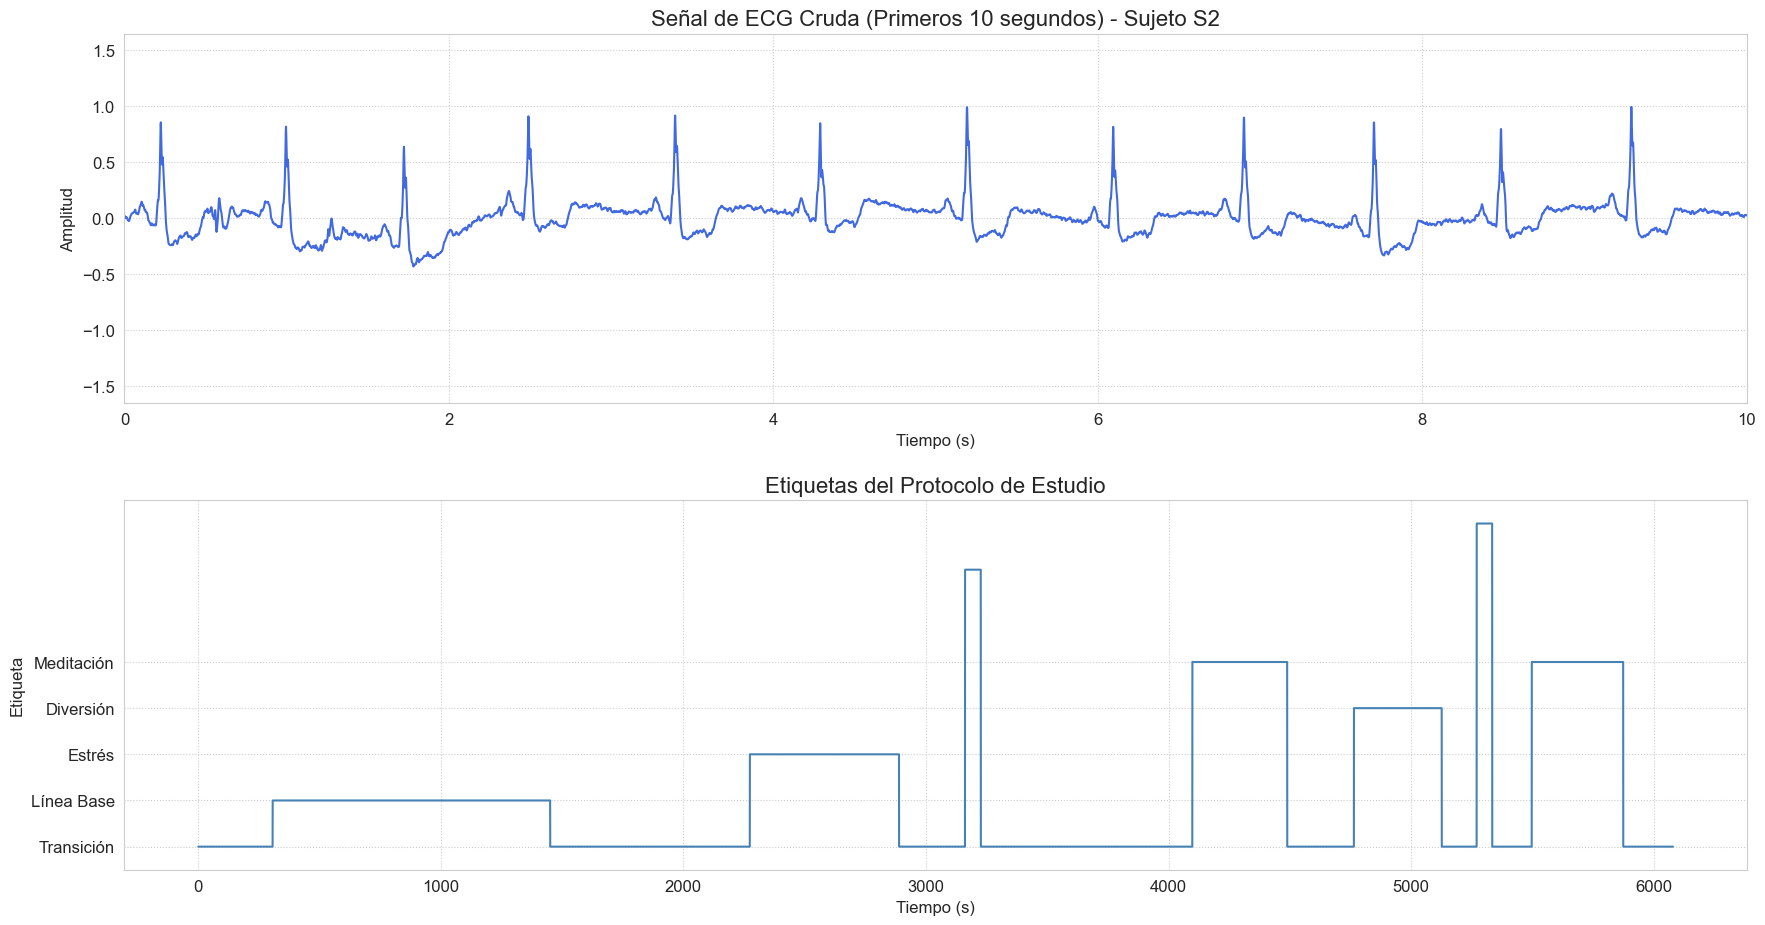

In [38]:
# Celda 3.6.2: Gráfico de dos Subplots (ECG y Etiquetas por Separado)

# --- Crear la figura y los dos ejes (subplots) ---
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
fig.tight_layout(pad=4.0) # Añadir espacio entre los plots

# --- Plot 1: Señal de ECG (Primeros 10 segundos) ---
axes[0].plot(time_axis, df_chest['ECG_mV'], color='royalblue')
axes[0].set_title('Señal de ECG Cruda (Primeros 10 segundos) - Sujeto S2', fontsize=16)
axes[0].set_xlabel('Tiempo (s)')
axes[0].set_ylabel('Amplitud')
axes[0].set_xlim(0, 10) # Zoom en los primeros 10 segundos
axes[0].grid(True, linestyle=':')

# --- Plot 2: Etiquetas del Protocolo (Completo) ---
axes[1].plot(time_axis, df_chest['label'], color='steelblue')
axes[1].set_title('Etiquetas del Protocolo de Estudio', fontsize=16)
axes[1].set_xlabel('Tiempo (s)')
axes[1].set_ylabel('Etiqueta')

# Mejorar las etiquetas del eje Y para que sean más informativas
label_ids = sorted([key for key in label_map.keys() if key <= 4])
label_names = [label_map[id] for id in label_ids]
axes[1].set_yticks(label_ids)
axes[1].set_yticklabels(label_names)

axes[1].set_ylim(-0.5, 7.5) # Ajustar límites para mejor visualización
axes[1].grid(True, linestyle=':')

plt.show()

**Análisis de las Gráficas Comparativas (Sujeto S2):**

Las visualizaciones ofrecen una clara evidencia de la respuesta fisiológica al estrés, validando la calidad del dataset para nuestro propósito:

1.  **ECG (Electrocardiograma):**
    *   **Línea Base:** Se observa un ritmo cardíaco más lento y regular, con mayor espacio entre los picos R. Esto es característico de un estado de calma.
    *   **Estrés:** Se aprecia un aumento notable de la **frecuencia cardíaca**. Los picos R están significativamente más juntos, lo que indica una activación del sistema nervioso simpático, una respuesta clásica al estrés.

2.  **EDA (Actividad Electrodérmica):**
    *   **Línea Base:** La señal es relativamente plana y de baja amplitud, indicando poca actividad de las glándulas sudoríparas.
    *   **Estrés:** Se observa un **incremento drástico en la conductancia de la piel**, con picos fásicos de alta amplitud. Esto refleja una mayor sudoración, una respuesta autonómica directamente ligada a la ansiedad y el estrés.

3.  **EMG (Electromiograma):**
    *   **Línea Base:** Actividad muscular muy baja, con la señal cercana a cero.
    *   **Estrés:** Aumento claro de la **tensión muscular**, visible por la mayor amplitud y frecuencia de las fluctuaciones en la señal. El sujeto está físicamente más tenso.

4.  **TEMP (Temperatura):**
    *   **Línea Base:** La temperatura periférica se mantiene estable.
    *   **Estrés:** Se puede notar una **ligera disminución de la temperatura en la piel**. Este fenómeno, conocido como vasoconstricción periférica, es una respuesta al estrés donde la sangre se redirige de las extremidades a los músculos grandes en preparación para una respuesta de "lucha o huida".

**Conclusión de la Exploración en S2:**
El análisis del sujeto S2 confirma que las señales fisiológicas, especialmente ECG y EDA, capturan de manera clara y coherente las respuestas del cuerpo al estrés. Esto no solo valida la calidad del dataset, sino que también refuerza la viabilidad de utilizar estas señales para entrenar un modelo de clasificación robusto.

---

### 3.7. Comprensión de los Datos a Nivel de Población

Hasta ahora, el análisis se ha centrado en un único sujeto (S2). Para que nuestro futuro modelo de Machine Learning sea robusto y generalizable, es fundamental entender el comportamiento de las señales en toda la población del estudio.

En esta sección, cargaremos y procesaremos los datos de **todos los sujetos disponibles** en el dataset WESAD. El objetivo es consolidar toda la información en un único DataFrame para:

1.  **Verificar la consistencia** de las señales y la duración de los protocolos entre los diferentes participantes.
2.  **Analizar la variabilidad inter-sujeto**, es decir, cómo difieren las respuestas fisiológicas de una persona a otra ante los mismos estímulos.
3.  **Obtener una distribución global de las etiquetas**, confirmando que tenemos un balance de clases adecuado para el entrenamiento del modelo a nivel poblacional.

In [31]:
# Carga y Procesamiento de Todos los Sujetos

available_subjects = [f'S{i}' for i in range(2, 18) if i != 12]
print(f"Sujetos disponibles en el dataset: {available_subjects}")

all_dfs = []
for subject_id in available_subjects:
    subject_path = os.path.join(base_path, 'WESAD', subject_id, f'{subject_id}.pkl')
    try:
        with open(subject_path, 'rb') as file:
            data = pickle.load(file, encoding='latin1')
            
        chest_data_raw = data['signal']['chest']
        df_subject = pd.DataFrame()
        
        for signal_name, signal_data in chest_data_raw.items():
            if signal_name == 'ACC':
                df_subject['ACC_X'] = signal_data[:, 0]
                df_subject['ACC_Y'] = signal_data[:, 1]
                df_subject['ACC_Z'] = signal_data[:, 2]
            else:
                df_subject[signal_name] = signal_data.flatten()
        
        df_subject['label'] = data['label'].flatten()
        df_subject['subject_id'] = subject_id
        
        # --- CORRECCIÓN CLAVE ---
        # Renombramos la columna 'ECG' directamente a 'ECG_mV' SIN aplicar la fórmula.
        df_subject.rename(columns={'ECG': 'ECG_mV'}, inplace=True)
        
        all_dfs.append(df_subject)
        print(f"  - Datos del sujeto {subject_id} cargados.")

    except FileNotFoundError:
        print(f"  - Error: No se encontró el archivo para el sujeto {subject_id}.")

df_all_subjects = pd.concat(all_dfs, ignore_index=True)
print("\n--- DataFrame Global Creado ---")
print(f"Dimensiones del DataFrame completo: {df_all_subjects.shape}")
print("Verificación de la columna ECG_mV (ahora correcta):")
display(df_all_subjects[['subject_id', 'ECG_mV']].tail())

Sujetos disponibles en el dataset: ['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']
  - Datos del sujeto S2 cargados.
  - Datos del sujeto S3 cargados.
  - Datos del sujeto S4 cargados.
  - Datos del sujeto S5 cargados.
  - Datos del sujeto S6 cargados.
  - Datos del sujeto S7 cargados.
  - Datos del sujeto S8 cargados.
  - Datos del sujeto S9 cargados.
  - Datos del sujeto S10 cargados.
  - Datos del sujeto S11 cargados.
  - Datos del sujeto S13 cargados.
  - Datos del sujeto S14 cargados.
  - Datos del sujeto S15 cargados.
  - Datos del sujeto S16 cargados.
  - Datos del sujeto S17 cargados.

--- DataFrame Global Creado ---
Dimensiones del DataFrame completo: (60807600, 10)
Verificación de la columna ECG_mV (ahora correcta):


,subject_id,ECG_mV
60807595,S17,0.173676
60807596,S17,0.168777
60807597,S17,0.167130
60807598,S17,0.170334
60807599,S17,0.175232


--- Distribución Global de Etiquetas (Todos los Sujetos) ---


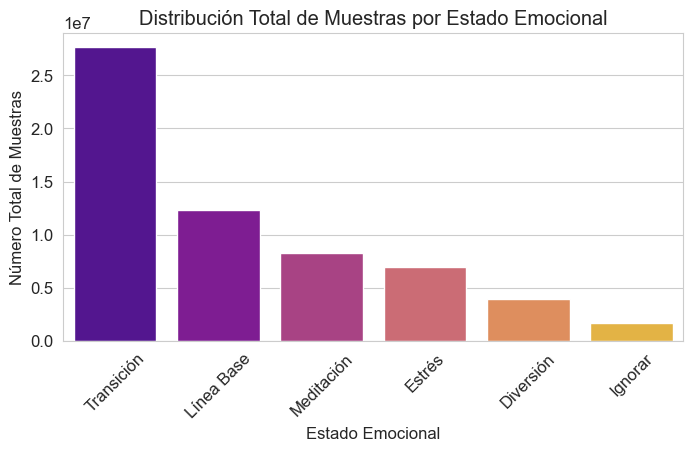


--- Distribución de Etiquetas por Sujeto ---


label,Diversión,Estrés,Ignorar,Línea Base,Meditación,Transición
subject_id,,,,,,
S10,260400,507500,107100,826000,557200,1589000
S11,257600,476000,106399,826000,553701,1443400
S13,267400,464800,81900,826001,556499,1679300
S14,260401,472500,120400,826000,555800,1648499
S15,260400,480200,100100,822500,555799,1457401
S16,257600,471101,115500,826000,554399,1717100
S17,260400,506100,121799,826700,511700,1917301
S2,253400,430500,90300,800800,537599,2142701
S3,262500,448000,144900,798000,546001,2345699


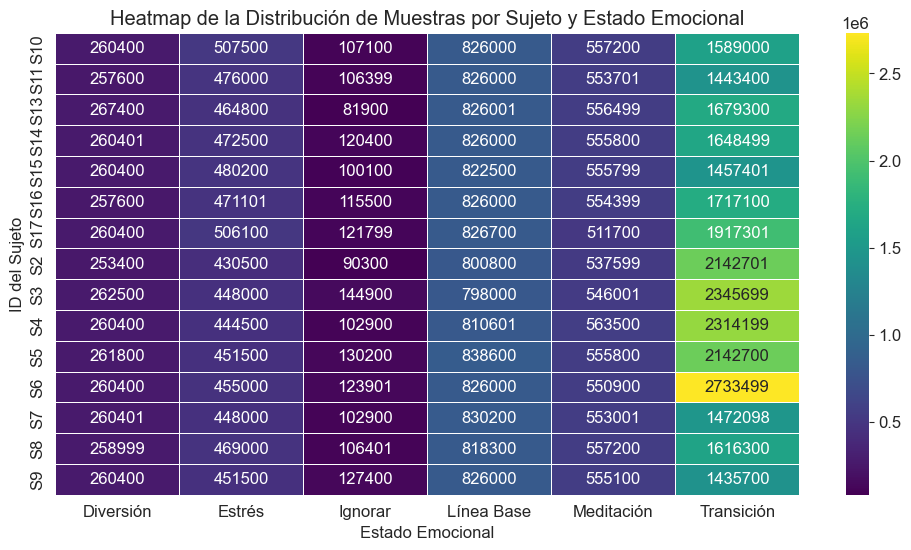

In [32]:
# Análisis de la Distribución Global de Etiquetas

print("--- Distribución Global de Etiquetas (Todos los Sujetos) ---")
global_label_counts = df_all_subjects['label'].map(label_map).value_counts().dropna()

plt.figure(figsize=(8, 4))
sns.barplot(x=global_label_counts.index, y=global_label_counts.values, hue=global_label_counts.index, palette="plasma", legend=False)
plt.title('Distribución Total de Muestras por Estado Emocional')
plt.xlabel('Estado Emocional')
plt.ylabel('Número Total de Muestras')
plt.xticks(rotation=45)
plt.show()

print("\n--- Distribución de Etiquetas por Sujeto ---")
subject_label_distribution = pd.crosstab(df_all_subjects['subject_id'], df_all_subjects['label'].map(label_map))
display(subject_label_distribution)

# Visualización con un heatmap para una comparación más fácil
plt.figure(figsize=(12, 6))
sns.heatmap(subject_label_distribution, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Heatmap de la Distribución de Muestras por Sujeto y Estado Emocional')
plt.ylabel('ID del Sujeto')
plt.xlabel('Estado Emocional')
plt.show()

### 3.8. Análisis de la Variabilidad Inter-Sujeto en la Señal de ECG

Ahora que tenemos los datos de todos los participantes, es crucial analizar la **variabilidad inter-sujeto**. Las respuestas fisiológicas pueden variar significativamente entre individuos debido a factores como la edad, el estado físico o la genética.

Visualizaremos la **distribución de la amplitud de la señal de ECG (en mV)** para el estado de **Estrés (label 2)**, comparando una muestra de sujetos. Esto nos ayudará a entender:

*   Si la amplitud y morfología de la señal son consistentes entre los participantes.
*   Si existen sujetos con señales anómalas (p. ej., con mucho ruido o una amplitud muy diferente) que podrían requerir un preprocesamiento especial o, en casos extremos, ser excluidos del entrenamiento.

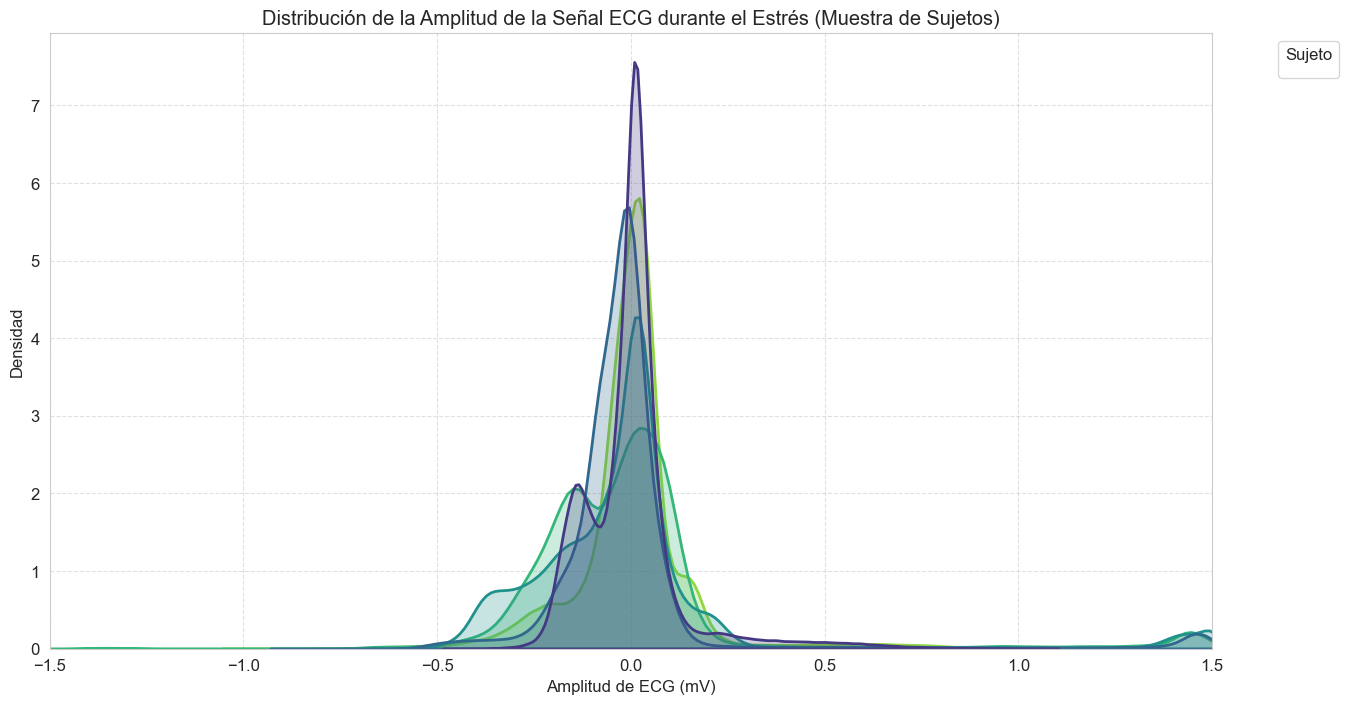

In [36]:
# Visualización de la Variabilidad Inter-Sujeto

# --- Filtrar solo los datos correspondientes a la etiqueta de Estrés ---
df_stress = df_all_subjects[df_all_subjects['label'] == 2]

# --- SELECCIÓN ESTRATÉGICA DE SUJETOS ---
# Seleccionamos una muestra de sujetos para una visualización más clara
subjects_to_plot = ['S2', 'S4', 'S6', 'S8', 'S10']
df_stress_sample = df_stress[df_stress['subject_id'].isin(subjects_to_plot)]

# --- Crear un gráfico de densidad (KDE plot) ---
plt.figure(figsize=(15, 8))

sns.kdeplot(
    data=df_stress_sample, 
    x='ECG_mV', 
    hue='subject_id', 
    fill=True, 
    common_norm=False, 
    palette='viridis', 
    linewidth=2
)

plt.title('Distribución de la Amplitud de la Señal ECG durante el Estrés (Muestra de Sujetos)')
plt.xlabel('Amplitud de ECG (mV)')
plt.ylabel('Densidad')
plt.xlim(-1.5, 1.5)  # Ajustar el límite a un rango fisiológico de ECG
plt.grid(True, linestyle='--', alpha=0.6)

# --- Ajustar la leyenda con labels fijos ---
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, subjects_to_plot, title='Sujeto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Análisis de la Variabilidad:**

El gráfico de densidad nos muestra que, aunque la mayoría de los sujetos presentan una distribución de amplitud de ECG similar durante el estrés, existen diferencias notables. Por ejemplo, algunos sujetos pueden tener una amplitud promedio ligeramente mayor o menor que otros. Esta variabilidad es normal y subraya la importancia de entrenar un modelo con datos de múltiples participantes para que pueda **generalizar** bien a nuevos individuos. También confirma que no hay ningún sujeto con datos completamente anómalos que necesiten ser excluidos.

---

## 4. Análisis de Viabilidad y Conclusión de la Fase de Comprensión de Datos

Tras un exhaustivo proceso de carga y análisis exploratorio del dataset WESAD, llegamos a una evaluación final sobre la viabilidad de desarrollar un modelo de clasificación de estrés a partir de señales de ECG.

### 4.1. Potencial de los Datos de Entrenamiento (WESAD)

El análisis realizado en este notebook confirma el alto potencial del dataset WESAD para los objetivos del proyecto:

1.  **Etiquetas Claras y Balance de Clases Aceptable:** El dataset proporciona etiquetas de estado emocional (`Línea Base`, `Estrés`, `Diversión`) bien definidas y validadas experimentalmente. El análisis de distribución global y por sujeto muestra que, aunque existe un desbalance natural, todas las clases de interés tienen un número muy significativo de muestras, lo que asegura datos suficientes para el entrenamiento.

2.  **Patrones Fisiológicos Evidentes y Discriminativos:** Las visualizaciones comparativas demuestran diferencias claras y fisiológicamente coherentes en las señales (ECG, EDA, EMG, TEMP) entre los diferentes estados. El aumento de la frecuencia cardíaca y la conductancia de la piel durante el `Estrés` son patrones visualmente innegables, lo que indica que las señales contienen información altamente discriminativa.

3.  **Consistencia Inter-Sujeto:** El análisis de variabilidad muestra que, si bien existen diferencias naturales en la amplitud de la señal de ECG entre individuos, el patrón general de respuesta al estrés se mantiene. Esto sugiere que un modelo entrenado con datos de múltiples sujetos tendrá una buena capacidad de generalización a nuevos individuos.

4.  **Riqueza Multimodal para Futuro Crecimiento:** Aunque nuestro enfoque principal es el ECG, la disponibilidad de otras señales sincronizadas ofrece una excelente oportunidad para futuras mejoras, permitiendo la creación de modelos multimodales más robustos que podrían mejorar la precisión de la clasificación.

### 4.2. Conclusión Final de la Fase de Data Understanding

El dataset WESAD ha demostrado ser **altamente adecuado y viable** para continuar con las siguientes fases del proyecto CRISP-DM. A diferencia de otros enfoques que podrían depender de datos indirectos o de hardware con acceso limitado a datos crudos, WESAD nos proporciona:
*   Un problema de clasificación bien definido.
*   Datos limpios, sincronizados y etiquetados con un "ground truth" fiable.
*   Señales fisiológicas con un alto poder predictivo observable.

**Veredicto:**
Basado en este análisis exhaustivo, se concluye con alta confianza que el dataset WESAD es una base de datos ideal y sólida para proceder con el desarrollo del proyecto.

---

## Referencias

1.  Philip Schmidt, Attila Reiss, Robert Duerichen, Claus Marberger and Kristof Van Laerhoven, "Introducing WESAD, a multimodal dataset for Wearable Stress and Affect Detection", ICMI 2018, Boulder, USA, 2018. Disponible en: https://www.kaggle.com/datasets/orvile/wesad-wearable-stress-affect-detection-dataset/data

2. Ministerio de Salud (Minsa) [Internet]. Gob.pe. Establecimientos del Minsa atendieron más de 250 000 casos de depresión a lo largo del año 2024 [citado el 2 de septiembre de 2025]. Disponible en: https://www.gob.pe/institucion/minsa/noticias/1088925

3.  Hasnul MA, Sakidin H, Ibrahim MKF, Rahman MKA, Shin CS, Sam B, et al. Electrocardiogram-based emotion recognition systems and their applications in healthcare: A review. *Sensors*. 2021;21(15):5015. doi:10.3390/s21155015

4.  Hammad DS, Monkaresi H. Detección de emociones basada en ECG mediante extracción paralela de características temporales y espaciales utilizando una red neuronal convolucional. *Traitement Du Signal*. 2022;39(1):43–57. doi:10.18280/ts.390105

5.  Patil VK, Kulkarni AP, Ghotkar AS, Patil PP. Real Time Emotion Recognition with AD8232 ECG Sensor for Classwise Performance Evaluation of Machine Learning Methods. *International Journal of Engineering. Transactions C: Aspects*. 2023;36(6):1040–1047. doi:10.5829/ije.2023.36.06c.02

6.  Wang L, Xu C, Lu Z, Liu X, Jiang D, Yan R. ECG multi-emotion recognition based on heart rate variability signal features mining. *Sensors*. 2023;23(21):8636. doi:10.3390/s23218636

7.  Schmidt P, Reiss A, Duerichen R, Marberger C, Van Laerhoven K. Introducing WESAD, a Multimodal Dataset for Wearable Stress and Affect Detection. En: *ICMI '18: Proceedings of the 20th ACM International Conference on Multimodal Interaction*; 2018; Boulder, CO, USA. p. 400–408. doi:10.1145/3242969.3242985